## 3. Plot mAP for morphological class and gene retrieval using CellProfiler and DeepProfiler features

In [ ]:
import umap
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from map_utils.plot import set_plotting_style, plot_map_x3

from mitocheck_plot_utils import plot_gene_vs_ms, plot_mc_cp_vs_dp, get_umap_palette

In [2]:
set_plotting_style()

In [3]:
gene_ap = pd.read_csv("data/processed/Metadata_Gene_ap_results.csv")
gene_ap.rename(columns={"average_precision": "AP"}, inplace=True)
gene_ap["Features"] = gene_ap["Features"].replace(
    {"cp": "CellProfiler features", "dp": "DeepProfiler features"}
)

/dgx1nas1/storage/data/akalinin/projects/map/map_utils/plot.py:126: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


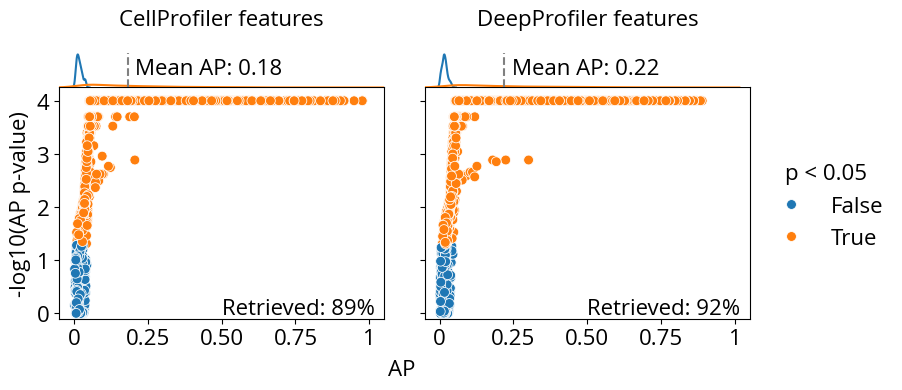

In [4]:
plot_map_x3(
    gene_ap,
    "Features",
    "",
    metric="AP",
    row=None,
    move_legend="lower right",
    aspect=None,
    adjust=None,
    pr_x=0.5,
    pr_y=0.02,
    l_x=1.05,
    l_y=0.575,
    m_x=0.52,
    m_y=0.01,
)

In [5]:
morphoclass_ap = pd.read_csv("data/processed/Mitocheck_Phenotypic_Class_ap_results.csv")
morphoclass_ap.rename(columns={"average_precision": "AP"}, inplace=True)
morphoclass_ap["Features"] = morphoclass_ap["Features"].replace(
    {"cp": "CellProfiler features", "dp": "DeepProfiler features"}
)

/dgx1nas1/storage/data/akalinin/projects/map/map_utils/plot.py:126: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


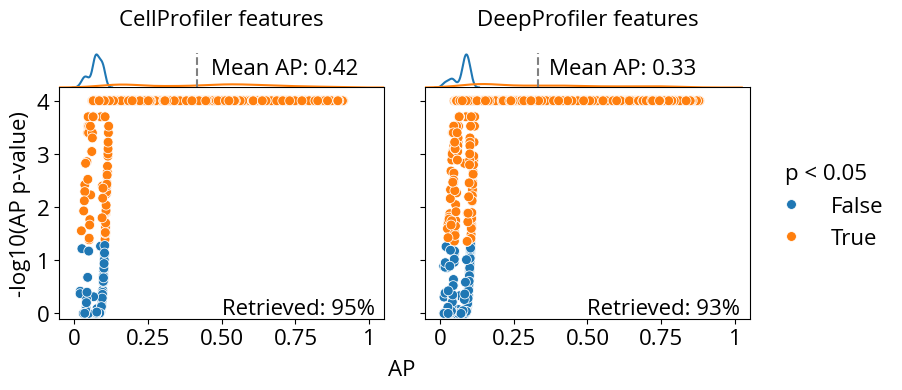

In [6]:
plot_map_x3(
    morphoclass_ap,
    "Features",
    "",
    metric="AP",
    row=None,
    move_legend="lower right",
    aspect=None,
    adjust=None,
    pr_x=0.5,
    pr_y=0.02,
    l_x=1.05,
    l_y=0.575,
    m_x=0.52,
    m_y=0.01,
)

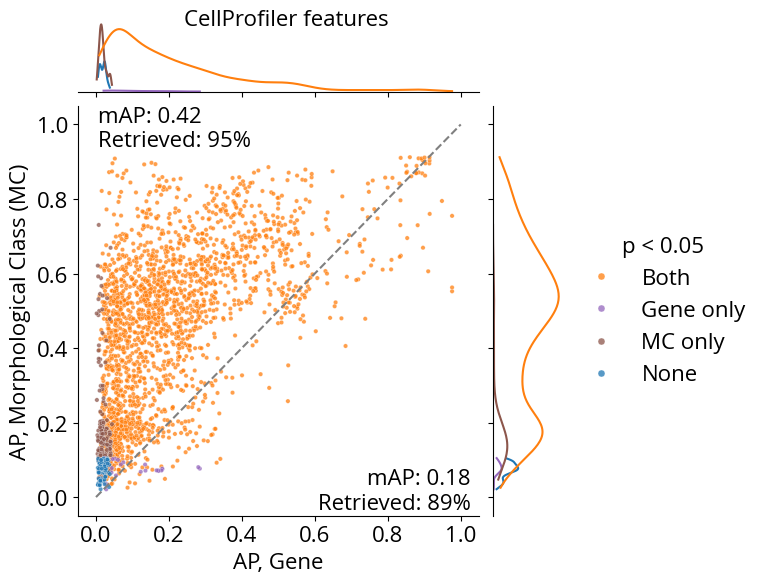

In [7]:
aps = pd.DataFrame(
    [
        gene_ap.query("Features == 'CellProfiler features'")["AP"],
        gene_ap.query("Features == 'CellProfiler features'")["p < 0.05"],
        morphoclass_ap.query("Features == 'CellProfiler features'")["AP"],
        morphoclass_ap.query("Features == 'CellProfiler features'")["p < 0.05"],
    ],
    index=["AP, Gene", "Gene p < 0.05", "AP, Morphological Class (MC)", "MC p < 0.05"],
).T

plot_gene_vs_ms(aps, title="CellProfiler features")

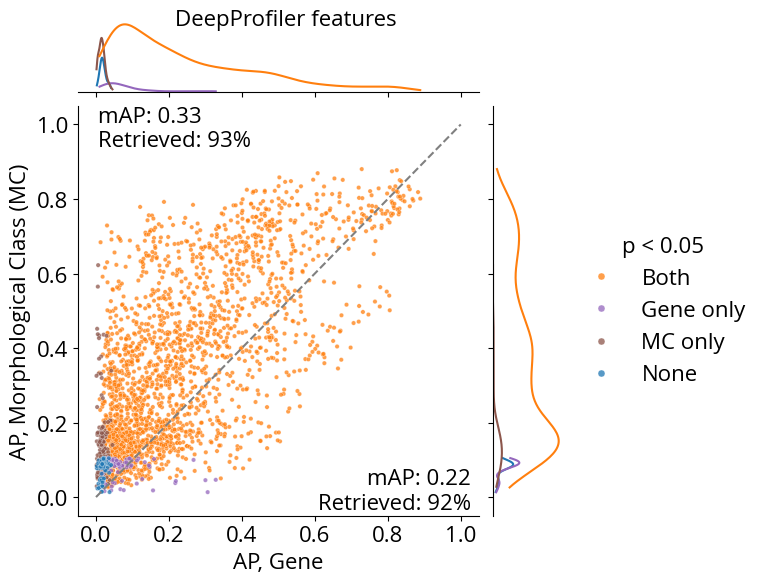

In [8]:
aps = pd.DataFrame(
    [
        gene_ap.query("Features == 'DeepProfiler features'")["AP"],
        gene_ap.query("Features == 'DeepProfiler features'")["p < 0.05"],
        morphoclass_ap.query("Features == 'DeepProfiler features'")["AP"],
        morphoclass_ap.query("Features == 'DeepProfiler features'")["p < 0.05"],
    ],
    index=["AP, Gene", "Gene p < 0.05", "AP, Morphological Class (MC)", "MC p < 0.05"],
).T

plot_gene_vs_ms(aps, title="DeepProfiler features")

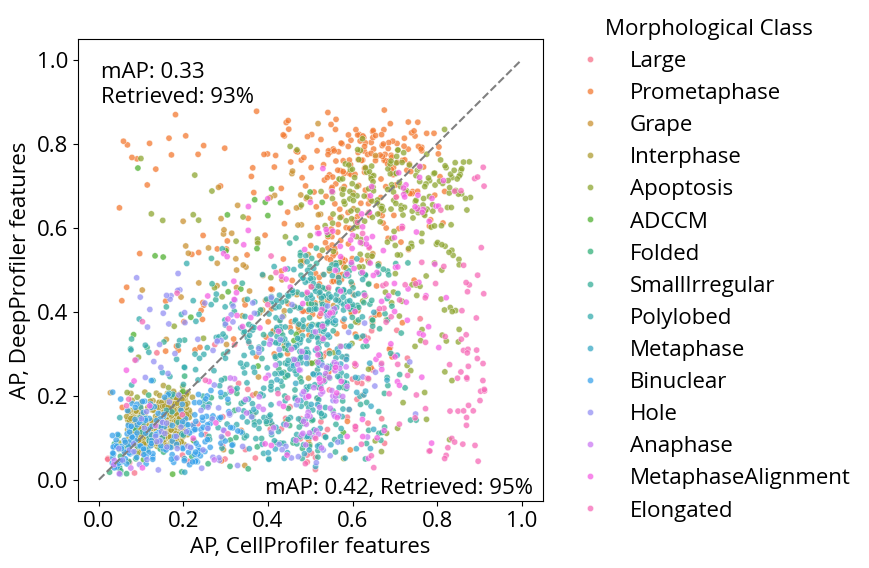

In [9]:
aps = pd.DataFrame(
    [
        morphoclass_ap.query("Features == 'CellProfiler features'")[
            "Mitocheck_Phenotypic_Class"
        ].reset_index(drop=True),
        morphoclass_ap.query("Features == 'CellProfiler features'")["AP"].reset_index(
            drop=True
        ),
        morphoclass_ap.query("Features == 'CellProfiler features'")[
            "p < 0.05"
        ].reset_index(drop=True),
        morphoclass_ap.query("Features == 'DeepProfiler features'")["AP"].reset_index(
            drop=True
        ),
        morphoclass_ap.query("Features == 'DeepProfiler features'")[
            "p < 0.05"
        ].reset_index(drop=True),
    ],
    index=[
        "Morphological Class",
        "AP, CellProfiler features",
        "CellProfiler retrieved",
        "AP, DeepProfiler features",
        "DeepProfiler retrieved",
    ],
).T

plot_mc_cp_vs_dp(aps, hue="Morphological Class")

In [10]:
s = (
    (
        morphoclass_ap[
            (morphoclass_ap["Features"] == "CellProfiler features")
            & morphoclass_ap["p < 0.05"]
        ]
        .groupby("Mitocheck_Phenotypic_Class")["AP"]
        .mean()
        - morphoclass_ap[
            (morphoclass_ap["Features"] == "DeepProfiler features")
            & morphoclass_ap["p < 0.05"]
        ]
        .groupby("Mitocheck_Phenotypic_Class")["AP"]
        .mean()
    )
    .sort_values(ascending=False)
    .index
)

df = morphoclass_ap.copy()
df["Mitocheck_Phenotypic_Class"] = pd.Categorical(
    df["Mitocheck_Phenotypic_Class"], categories=s, ordered=True
)
df = df.sort_values("Mitocheck_Phenotypic_Class")

/tmp/ipykernel_13086/4005500184.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(),rotation=90)


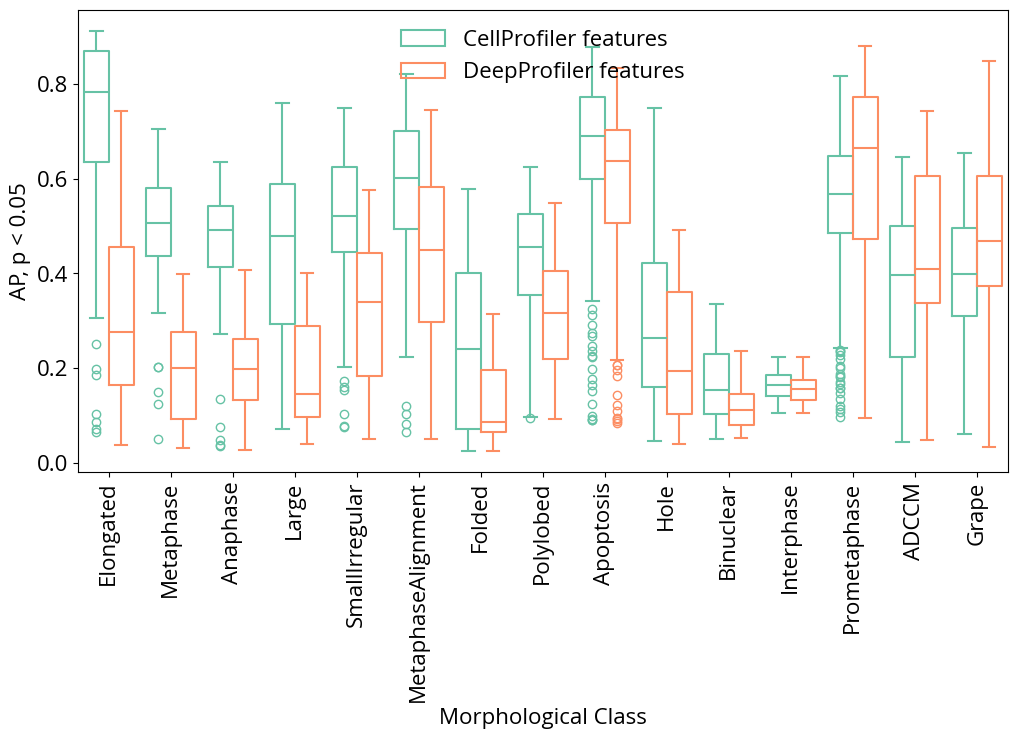

In [11]:
fig = plt.figure(figsize=(12, 6))

ax = sns.boxplot(
    data=df[df["p < 0.05"]].rename(
        columns={
            "AP": "AP, p < 0.05",
            "Mitocheck_Phenotypic_Class": "Morphological Class",
        }
    ),
    x="Morphological Class",
    y="AP, p < 0.05",
    hue="Features",
    fill=False,
    palette="Set2",
)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)


plt.legend(frameon=False, title=None, loc="upper center")
plt.show()

In [12]:
aps_retrieval_classes = pd.DataFrame(
    [
        df.query("Features == 'CellProfiler features'")["Cell_UUID"].reset_index(
            drop=True
        ),
        df.query("Features == 'CellProfiler features'")[
            "Mitocheck_Phenotypic_Class"
        ].reset_index(drop=True),
        df.query("Features == 'CellProfiler features'")["AP"].reset_index(drop=True),
        df.query("Features == 'CellProfiler features'")["p < 0.05"].reset_index(
            drop=True
        ),
        df.query("Features == 'DeepProfiler features'")["AP"].reset_index(drop=True),
        df.query("Features == 'DeepProfiler features'")["p < 0.05"].reset_index(
            drop=True
        ),
    ],
    index=[
        "Cell ID",
        "Morphological Class",
        "AP, CellProfiler features",
        "CellProfiler retrieved",
        "AP, DeepProfiler features",
        "DeepProfiler retrieved",
    ],
).T

In [13]:
training_sc_data = pd.read_parquet("data/processed/training_sc_fs.parquet")
neg_control_sc_data = pd.read_parquet("data/processed/neg_control_sc_fs_subset.parquet")
training_sc_data = training_sc_data[neg_control_sc_data.columns]
sc_df = pd.concat([training_sc_data, neg_control_sc_data], axis=0)
sc_df = sc_df.query(
    "Metadata_Gene != 'failed QC' and Mitocheck_Phenotypic_Class != 'OutOfFocus'"
)

In [14]:
reducer = umap.UMAP(metric="cosine", n_neighbors=30, min_dist=0.1, random_state=42)
morpho_classes = [
    mc for mc in sc_df["Mitocheck_Phenotypic_Class"].unique() if mc != "neg_control"
]

mc_umap_cp = []
mc_umap_dp = []
for mc in morpho_classes:
    df_mc = sc_df[sc_df.Mitocheck_Phenotypic_Class.isin([mc, "neg_control"])]
    embed_cp = reducer.fit_transform(df_mc.filter(regex="^CP_").values)
    embed_dp = reducer.fit_transform(df_mc.filter(regex="^DP_").values)
    meta_mc = df_mc.filter(regex="^CP_|^DP_").reset_index(drop=True)

    embed_cp_df = pd.concat(
        [meta_mc, pd.DataFrame(embed_cp, columns=["umap_0", "umap_1"])], axis="columns"
    )
    embed_dp_df = pd.concat(
        [meta_mc, pd.DataFrame(embed_dp, columns=["umap_0", "umap_1"])], axis="columns"
    )
    mc_umap_cp.append(embed_cp_df)
    mc_umap_dp.append(embed_dp_df)

/dgx1nas1/storage/data/akalinin/miniconda3/envs/map_benchmark/lib/python3.10/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


/tmp/ipykernel_13086/2954406306.py:19: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  merged_data.fillna(value={"CellProfiler retrieved": False, "DeepProfiler retrieved": False}, inplace=True)


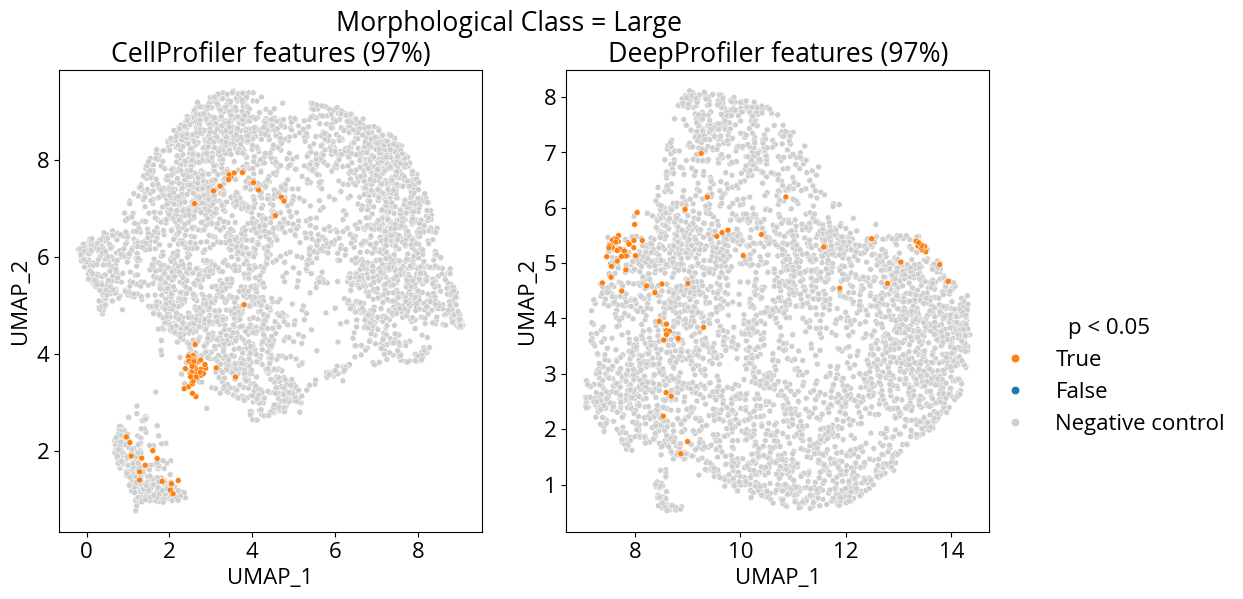

/tmp/ipykernel_13086/2954406306.py:19: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  merged_data.fillna(value={"CellProfiler retrieved": False, "DeepProfiler retrieved": False}, inplace=True)


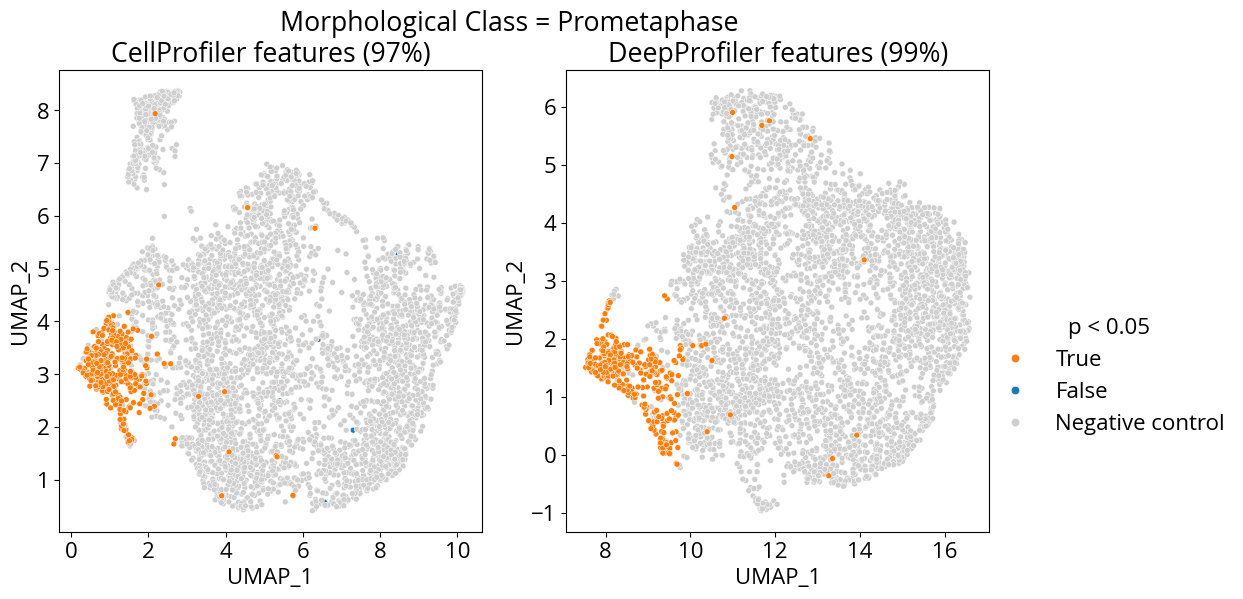

/tmp/ipykernel_13086/2954406306.py:19: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  merged_data.fillna(value={"CellProfiler retrieved": False, "DeepProfiler retrieved": False}, inplace=True)


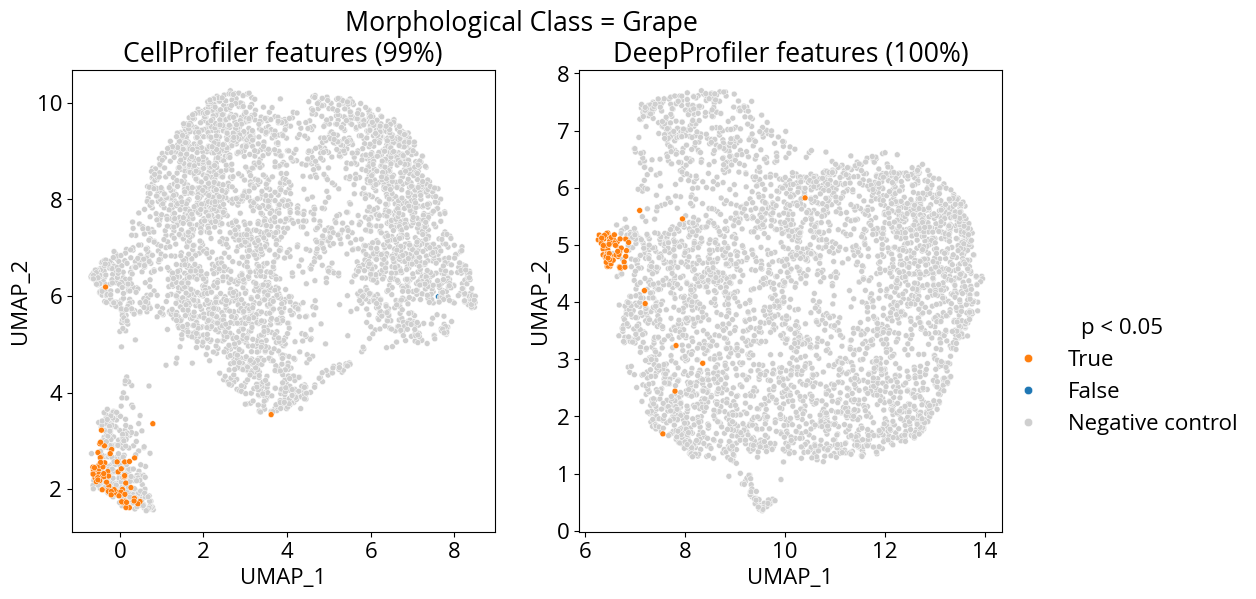

/tmp/ipykernel_13086/2954406306.py:19: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  merged_data.fillna(value={"CellProfiler retrieved": False, "DeepProfiler retrieved": False}, inplace=True)


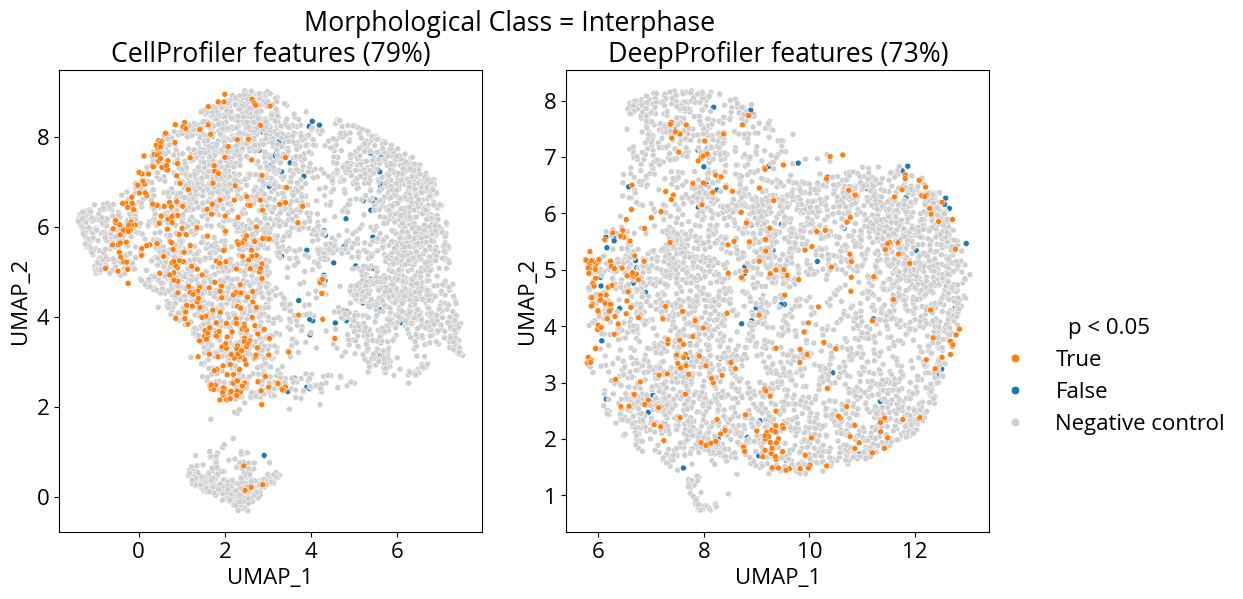

/tmp/ipykernel_13086/2954406306.py:19: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  merged_data.fillna(value={"CellProfiler retrieved": False, "DeepProfiler retrieved": False}, inplace=True)


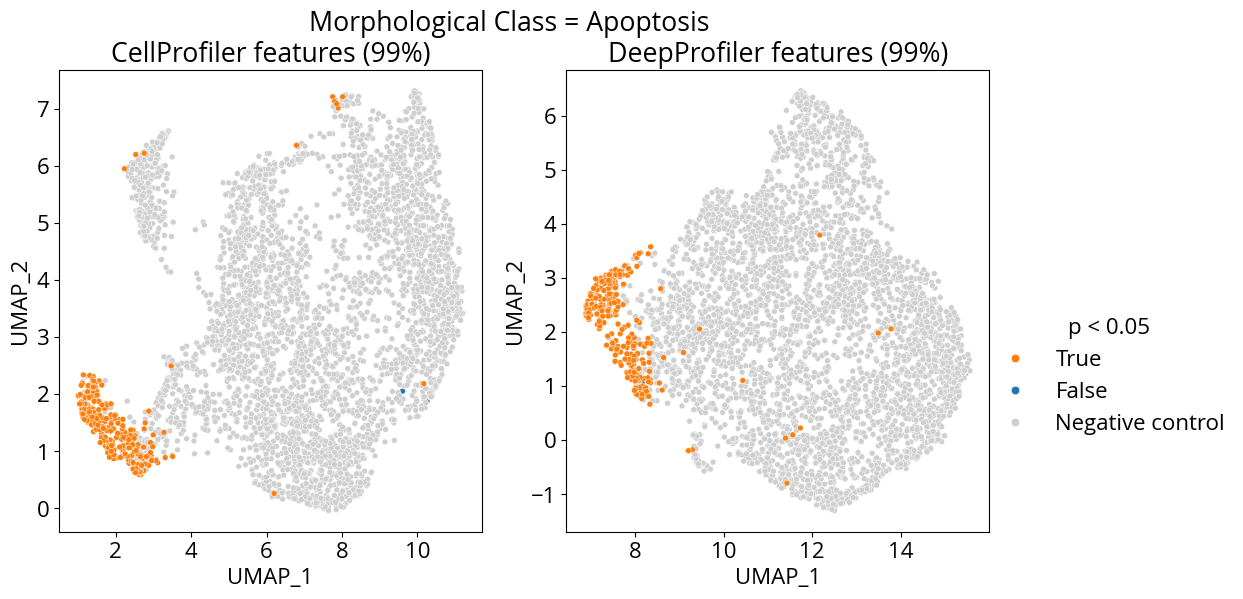

/tmp/ipykernel_13086/2954406306.py:19: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  merged_data.fillna(value={"CellProfiler retrieved": False, "DeepProfiler retrieved": False}, inplace=True)


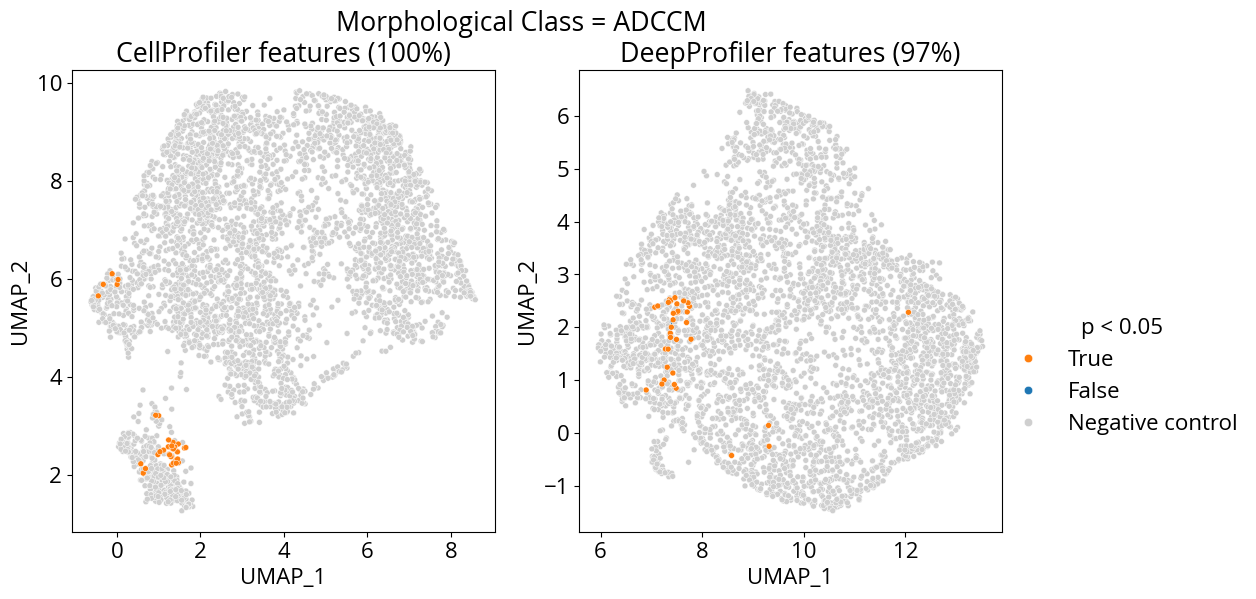

/tmp/ipykernel_13086/2954406306.py:19: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  merged_data.fillna(value={"CellProfiler retrieved": False, "DeepProfiler retrieved": False}, inplace=True)


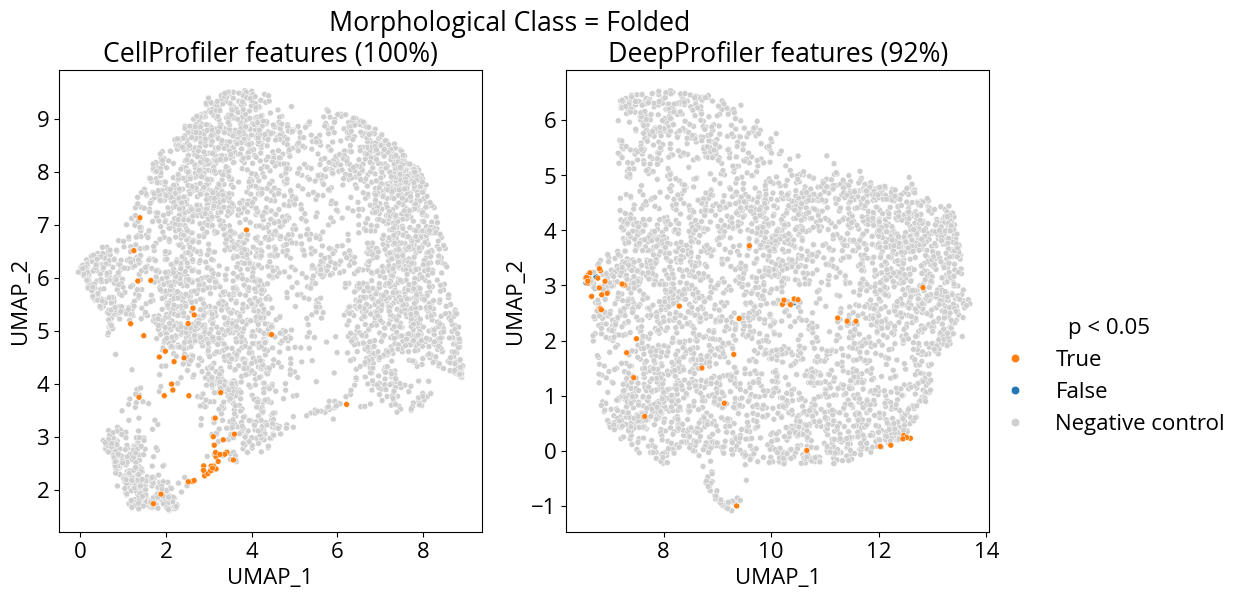

/tmp/ipykernel_13086/2954406306.py:19: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  merged_data.fillna(value={"CellProfiler retrieved": False, "DeepProfiler retrieved": False}, inplace=True)


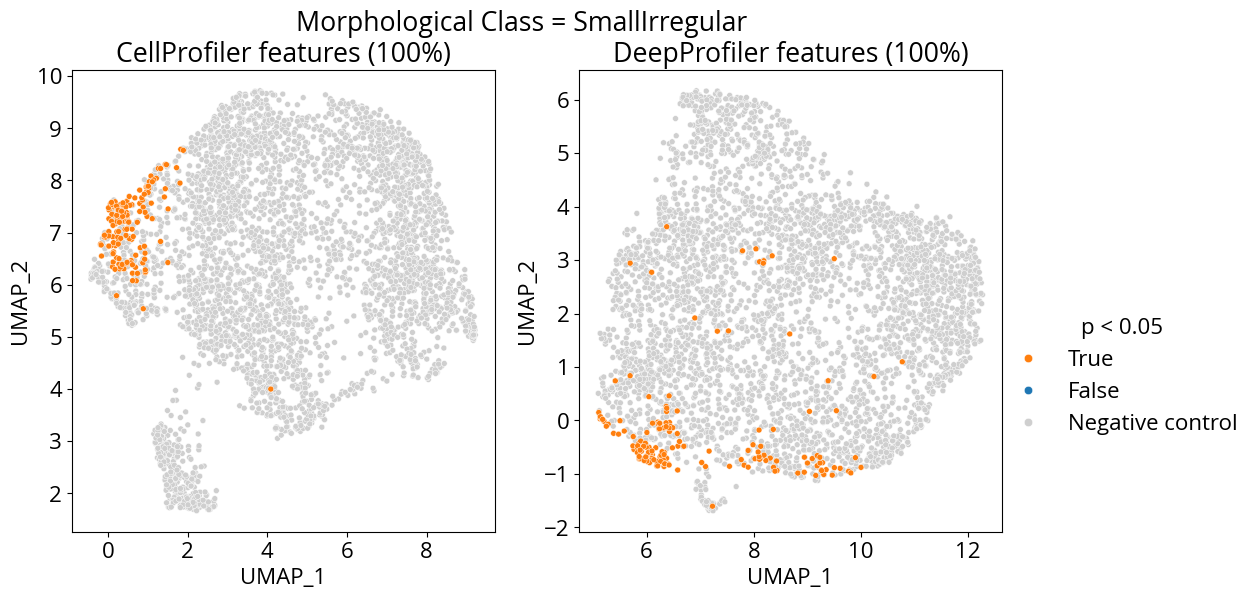

/tmp/ipykernel_13086/2954406306.py:19: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  merged_data.fillna(value={"CellProfiler retrieved": False, "DeepProfiler retrieved": False}, inplace=True)


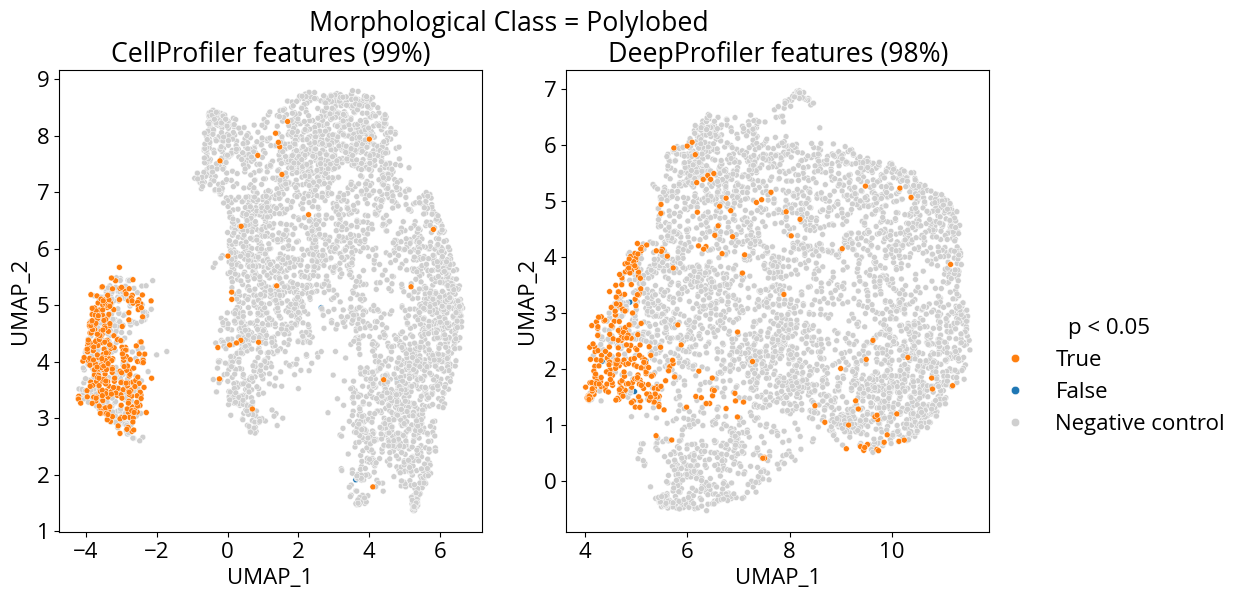

/tmp/ipykernel_13086/2954406306.py:19: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  merged_data.fillna(value={"CellProfiler retrieved": False, "DeepProfiler retrieved": False}, inplace=True)


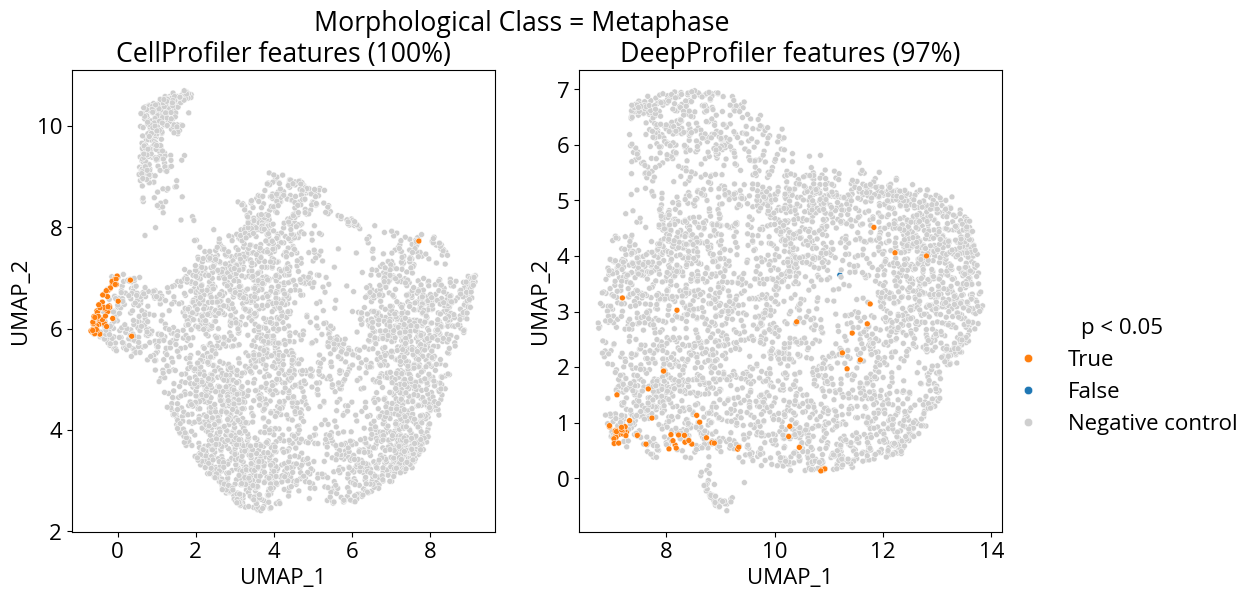

/tmp/ipykernel_13086/2954406306.py:19: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  merged_data.fillna(value={"CellProfiler retrieved": False, "DeepProfiler retrieved": False}, inplace=True)


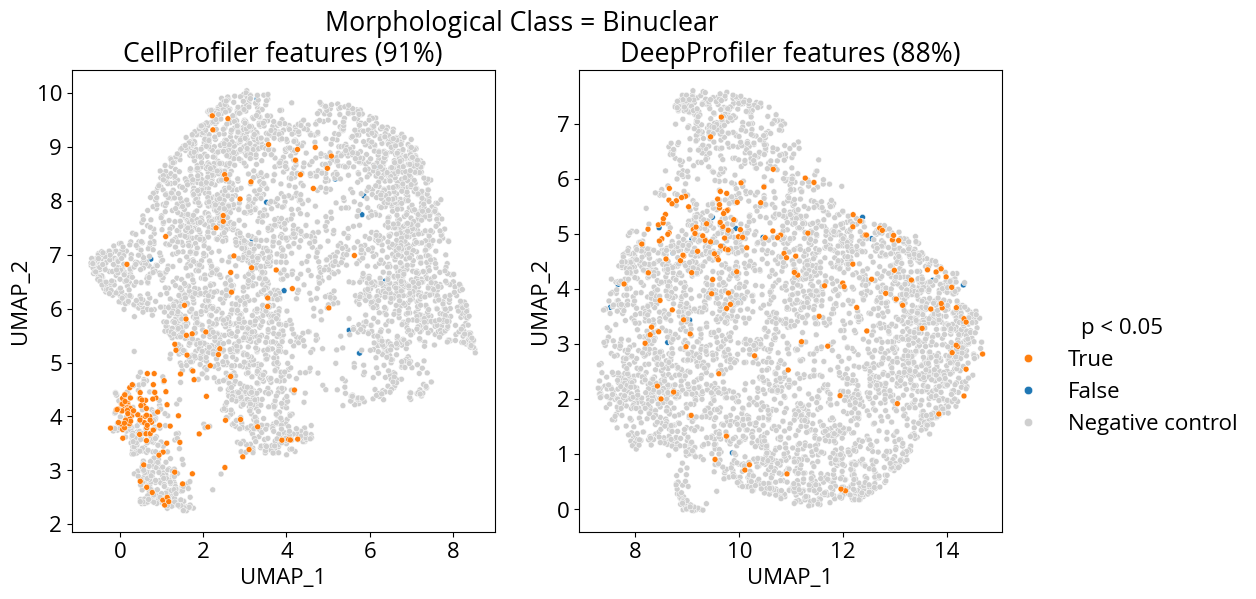

/tmp/ipykernel_13086/2954406306.py:19: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  merged_data.fillna(value={"CellProfiler retrieved": False, "DeepProfiler retrieved": False}, inplace=True)


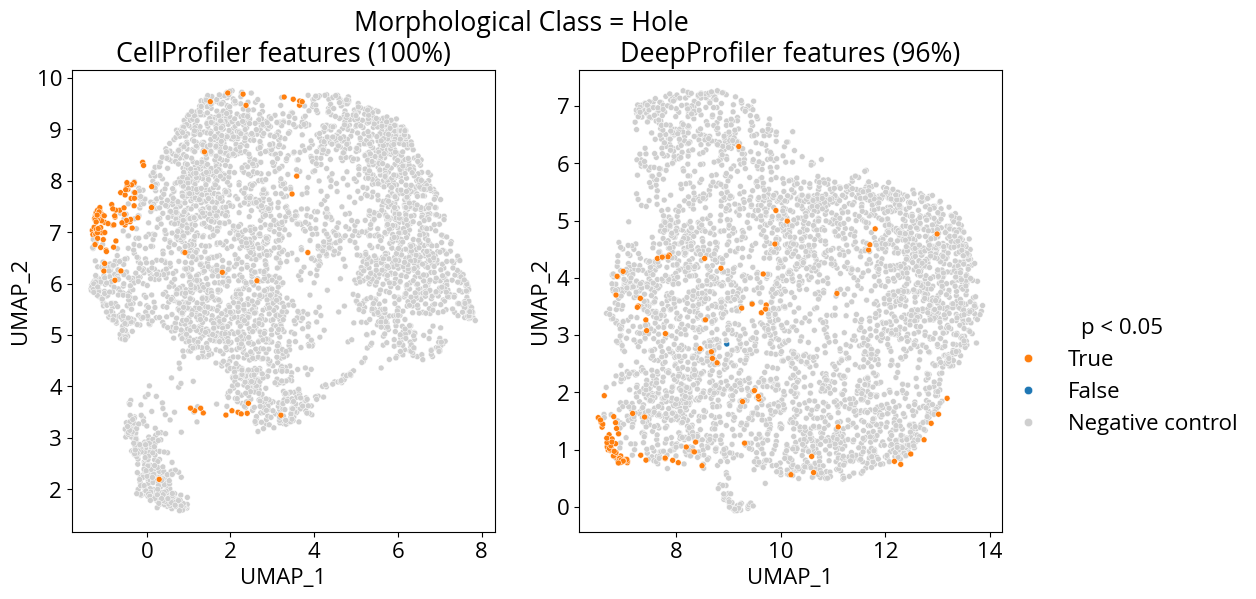

/tmp/ipykernel_13086/2954406306.py:19: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  merged_data.fillna(value={"CellProfiler retrieved": False, "DeepProfiler retrieved": False}, inplace=True)


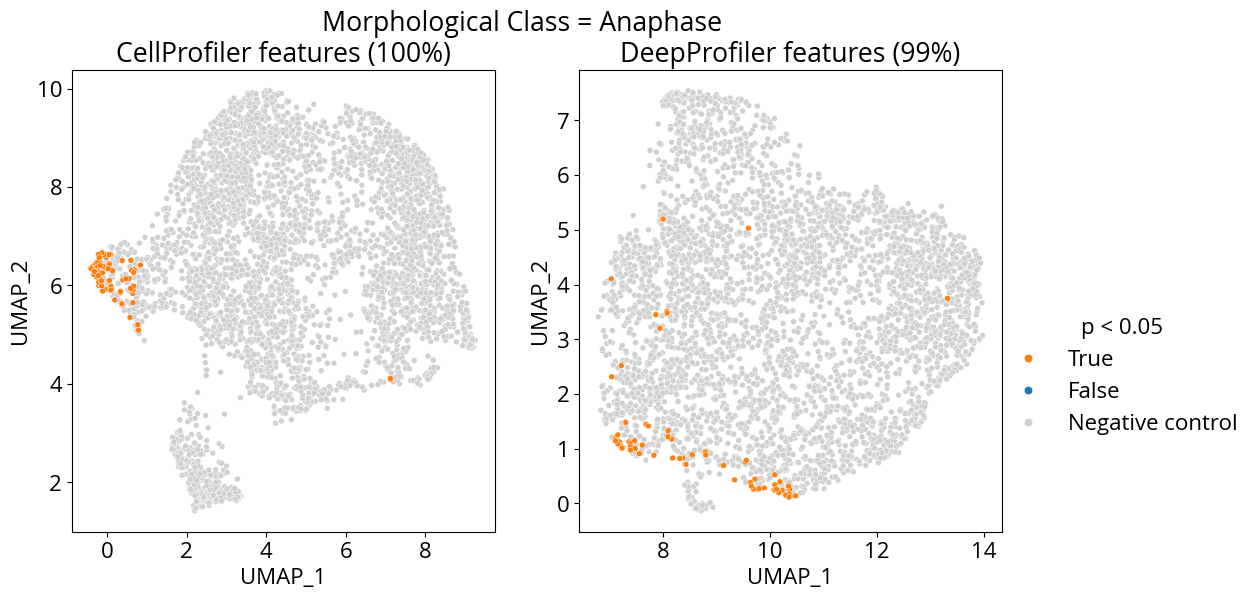

/tmp/ipykernel_13086/2954406306.py:19: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  merged_data.fillna(value={"CellProfiler retrieved": False, "DeepProfiler retrieved": False}, inplace=True)


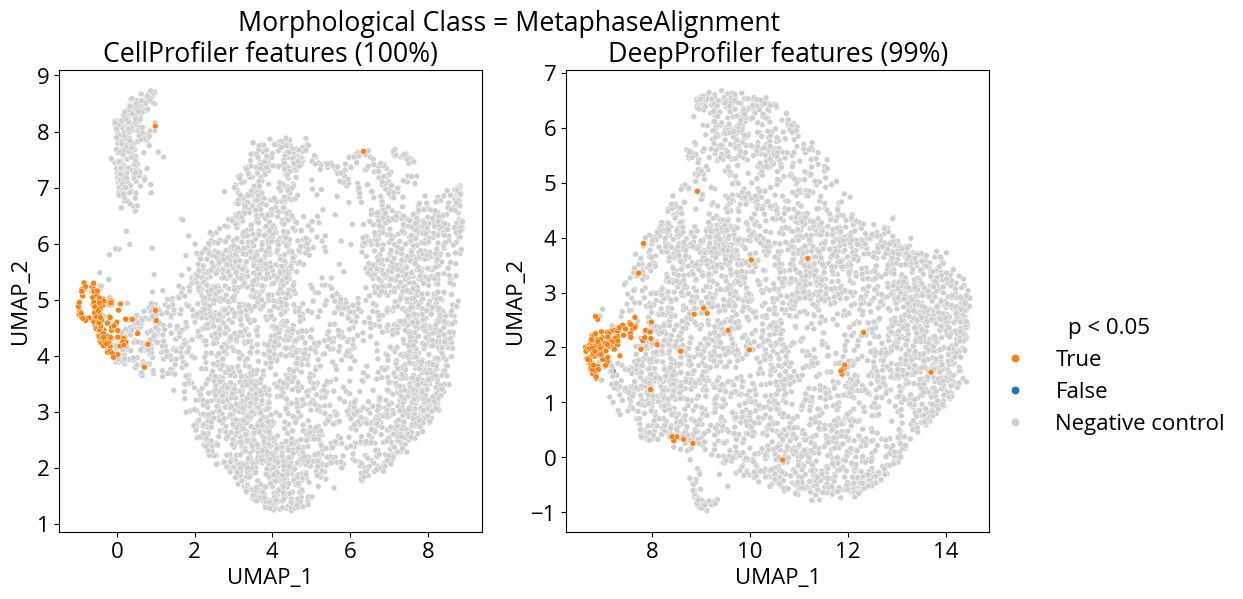

/tmp/ipykernel_13086/2954406306.py:19: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  merged_data.fillna(value={"CellProfiler retrieved": False, "DeepProfiler retrieved": False}, inplace=True)


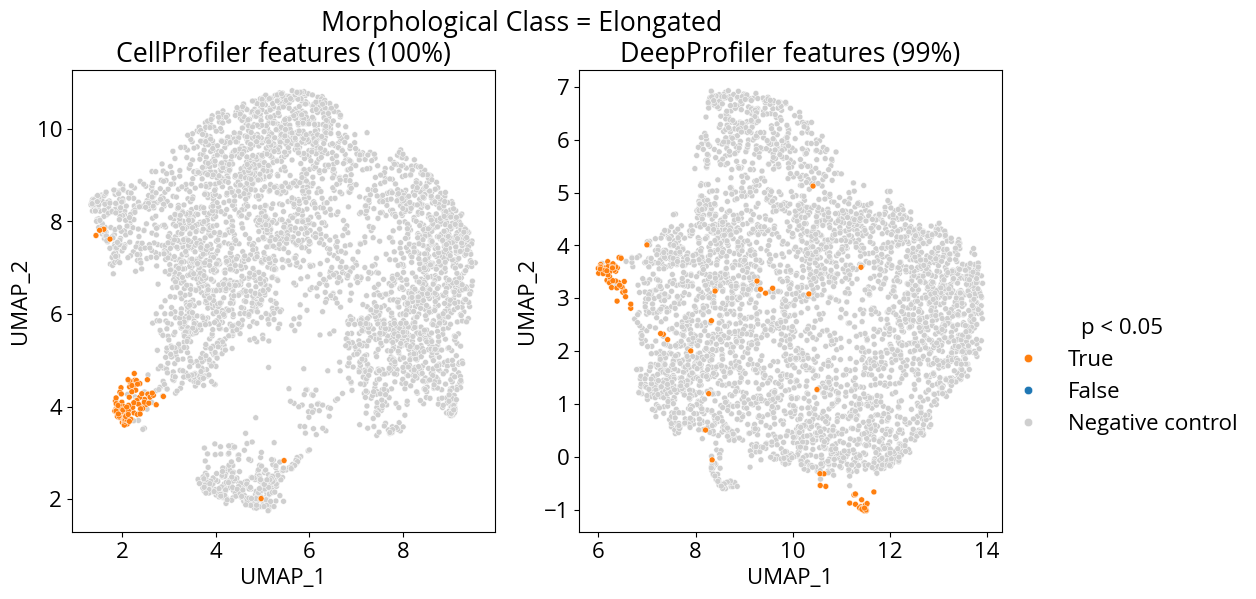

In [15]:
morpho_classes = [
    mc for mc in sc_df["Mitocheck_Phenotypic_Class"].unique() if mc != "neg_control"
]

for mc_idx, morpho_class in enumerate(morpho_classes):
    df_mc = sc_df[
        sc_df.Mitocheck_Phenotypic_Class.isin([morpho_class, "neg_control"])
    ].reset_index(drop=True)
    df_mc["UMAP1_CP"] = mc_umap_cp[mc_idx]["umap_0"]
    df_mc["UMAP2_CP"] = mc_umap_cp[mc_idx]["umap_1"]
    df_mc["UMAP1_DP"] = mc_umap_dp[mc_idx]["umap_0"]
    df_mc["UMAP2_DP"] = mc_umap_dp[mc_idx]["umap_1"]

    merged_data = df_mc.merge(
        aps_retrieval_classes, how="left", left_on=["Cell_UUID"], right_on=["Cell ID"]
    )

    cp_retrieval = merged_data["CellProfiler retrieved"].mean()
    dp_retrieval = merged_data["DeepProfiler retrieved"].mean()
    merged_data.fillna(
        value={"CellProfiler retrieved": False, "DeepProfiler retrieved": False},
        inplace=True,
    )
    merged_data["class"] = merged_data["Mitocheck_Phenotypic_Class"] == morpho_class
    merged_data["Is control"] = ~merged_data["class"]

    merged_data_cp = merged_data.copy()
    merged_data_dp = merged_data.copy()

    merged_data_cp.rename(
        columns={"UMAP1_CP": "UMAP_1", "UMAP2_CP": "UMAP_2"}, inplace=True
    )
    merged_data_dp.rename(
        columns={"UMAP1_DP": "UMAP_1", "UMAP2_DP": "UMAP_2"}, inplace=True
    )

    fig, ax = plt.subplots(1, 2, figsize=(12, 6))
    merged_data_cp["hue"] = "Negative control"
    merged_data_cp.loc[
        merged_data_cp["class"] & ~merged_data_cp["CellProfiler retrieved"], "hue"
    ] = "False"
    merged_data_cp.loc[
        merged_data_cp["class"] & merged_data_cp["CellProfiler retrieved"], "hue"
    ] = "True"
    sns.scatterplot(
        data=merged_data_cp.sort_values("hue"),
        x="UMAP_1",
        y="UMAP_2",
        hue="hue",
        hue_order=["True", "False", "Negative control"],
        palette=get_umap_palette(n=merged_data_cp.hue.nunique())[::-1],
        size=10,
        ax=ax[0],
    )
    ax[0].set_title(f"CellProfiler features ({cp_retrieval:.0%})")
    ax[0].get_legend().remove()

    merged_data_dp["hue"] = "Negative control"
    merged_data_dp.loc[
        merged_data_dp["class"] & ~merged_data_dp["DeepProfiler retrieved"], "hue"
    ] = "False"
    merged_data_dp.loc[
        merged_data_dp["class"] & merged_data_dp["DeepProfiler retrieved"], "hue"
    ] = "True"
    sns.scatterplot(
        data=merged_data_dp.sort_values("hue"),
        x="UMAP_1",
        y="UMAP_2",
        hue="hue",
        hue_order=["True", "False", "Negative control"],
        palette=get_umap_palette(n=merged_data_dp.hue.nunique())[::-1],
        size=10,
        ax=ax[1],
    )
    ax[1].set_title("DeepProfiler features ({:.0%})".format(dp_retrieval))
    handles, labels = ax[1].get_legend_handles_labels()
    ax[1].get_legend().remove()

    fig.suptitle(f"Morphological Class = {morpho_class}")
    fig.legend(
        handles[:-1],
        labels[:-1],
        title="p < 0.05",
        loc="upper center",
        bbox_to_anchor=(1.0, 0.5),
        frameon=False,
    )
    plt.show()